In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette(sns.dark_palette("red"))

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv


In [2]:
#Read csv file and create a dataframe

df=pd.read_csv("/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv")

df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


In [3]:
#Get more info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [4]:
#Checking for missing data

df.isna().sum()

df['type']

0         Movie
1         Movie
2         Movie
3         Movie
4       TV Show
         ...   
1445      Movie
1446      Movie
1447      Movie
1448      Movie
1449      Movie
Name: type, Length: 1450, dtype: object

In [5]:
#Unique values per 
df["country"].unique()

array([nan, 'United States', 'United States, Canada',
       'United States, Australia', 'Canada',
       'United States, United Kingdom', 'United States, South Korea',
       'Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary',
       'France, United Kingdom', 'United Kingdom, Australia',
       'Ireland, United States', 'Canada, United States, France',
       'France, South Korea, Japan, United States', 'France',
       'United States, United Kingdom, Hungary', 'United States, Germany',
       'United States, United Kingdom, Australia', 'United States, India',
       'United States, Canada, United Kingdom, Singapore, Australia, Thailand',
       'Canada, United States',
       'South Korea, United States, China, Japan',
       'Australia, United Kingdom', 'United Kingdom',
       'United States, United Kingdom, South Korea',
       'United States, United Kingdom, Canada',
       'United States, Germany, United Kingdom',
       'United States, Canada, Ire

In [6]:
#1. Replace NAN in country and rating column

m=df['country'].mode()[0]

df['country'].fillna(m,inplace=True)


r=df['rating'].mode()[0]

df['rating'].fillna(r,inplace=True)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",United States,"November 25, 2021",2021,TV-G,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [7]:
#remove minutes and season/s from duration

df['time_duration']= df['duration'].apply(lambda x: x.replace(' min','').replace(' Seasons','').replace(' Season',''))

df['time_duration']= df['time_duration'].astype(int)

In [8]:
#Create new columns and filter out the listed_in column

df['Comedy']=df['listed_in']. apply(lambda x: 1 if 'comedy' in x.lower() else 0)
df['Science_Fiction']=df['listed_in']. apply(lambda x: 1 if 'science fiction' in x.lower() else 0)
df['Romance']=df['listed_in']. apply(lambda x: 1 if 'romance' in x.lower() else 0)
df['Animation']=df['listed_in']. apply(lambda x: 1 if 'animation' in x.lower() else 0)
df['Drama']=df['listed_in']. apply(lambda x: 1 if 'drama' in x.lower() else 0)
df['Musical']=df['listed_in']. apply(lambda x: 1 if 'musical' in x.lower() else 0)
df['Action']=df['listed_in']. apply(lambda x: 1 if 'action-adventure' in x.lower() else 0)  


df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'time_duration', 'Comedy', 'Science_Fiction', 'Romance', 'Animation',
       'Drama', 'Musical', 'Action'],
      dtype='object')

In [9]:
#drop column not needed in analysis 

new_df= df.drop(['director','cast','date_added'], axis=1)


new_df



,show_id,type,title,country,release_year,rating,duration,listed_in,description,time_duration,Comedy,Science_Fiction,Romance,Animation,Drama,Musical,Action
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,23,0,0,0,1,0,0,0
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,91,1,0,0,0,0,0,0
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23,1,0,0,1,0,0,0
3,s4,Movie,The Queen Family Singalong,United States,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",41,0,0,0,0,0,1,0
4,s5,TV Show,The Beatles: Get Back,United States,2021,TV-G,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,108,0,1,0,0,0,0,1
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,106,1,0,0,0,0,0,1
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",107,1,0,0,0,1,0,0
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,112,1,0,0,0,0,0,0


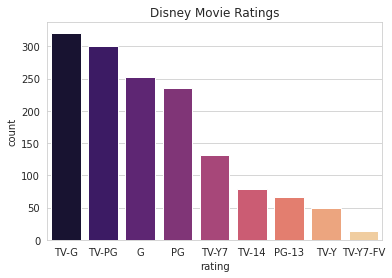

In [10]:
#Visualization of Disney movie ratings

sns.countplot(x = 'rating', data = new_df, palette='magma',order=['TV-G','TV-PG','G','PG','TV-Y7','TV-14','PG-13','TV-Y','TV-Y7-FV'])
plt.title('Disney Movie Ratings')
plt.show()

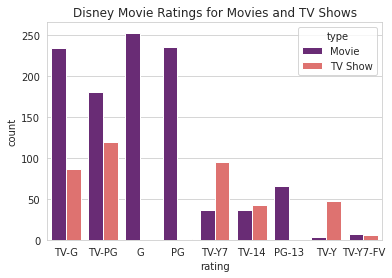

In [11]:
#Ratings of Disney movies 
sns.countplot(x = 'rating', data = new_df,hue='type', palette='magma',order=['TV-G','TV-PG','G','PG','TV-Y7','TV-14','PG-13','TV-Y','TV-Y7-FV'])
plt.title('Disney Movie Ratings for Movies and TV Shows')
plt.show()

In [12]:
# Groupby Movie and aggregate time duration


new_df['type']=='Movie'

movies_df= new_df[new_df['type']=='Movie']

movies_df['time_duration'].astype(float)

movies_df_agg= movies_df.groupby('release_year', as_index=False)['time_duration'].mean()

movies_df_agg

,release_year,time_duration
0,1928,8.000000
1,1932,7.666667
2,1933,8.666667
3,1934,8.750000
4,1935,9.750000
...,...,...
85,2017,80.272727
86,2018,80.187500
87,2019,59.295082
88,2020,66.054054


In [13]:
# Groupby TV Show and aggregate time duration

new_df['type']=='TV Show'

TVShow_df= new_df[new_df['type']=='TV Show']

TVShow_df['time_duration'].astype(float)

TVShow_df_agg= TVShow_df.groupby('release_year', as_index=False)['time_duration'].mean()

TVShow_df_agg

,release_year,time_duration
0,1955,1.000000
1,1973,6.000000
2,1976,5.000000
3,1979,1.000000
4,1982,1.000000
5,1985,3.333333
6,1988,4.000000
7,1989,14.000000
8,1990,1.000000
9,1991,3.000000


Text(0.5, 1.0, 'Time Duration of Disney Movies 1920s to 2021')

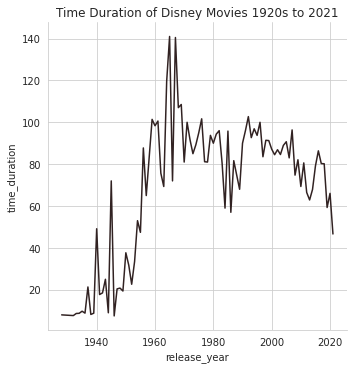

In [14]:
#Duration of Disney Movie since the 1920s

sns.relplot(
    data=movies_df_agg, 
    x="release_year", y="time_duration", 
    kind="line")
plt.title('Time Duration of Disney Movies 1920s to 2021')

Text(0.5, 1.0, 'Time Duration of Disney TV Shows 1950s to 2021')

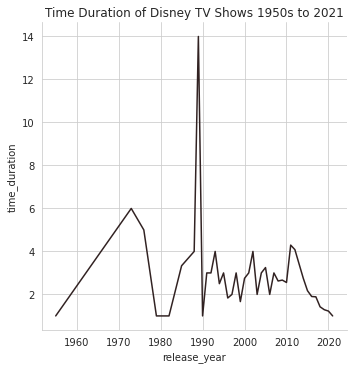

In [15]:
#Duration of Disney TV Shows since the 50s
sns.relplot(
    data=TVShow_df_agg, 
    x="release_year", y="time_duration", 
    kind="line")
plt.title('Time Duration of Disney TV Shows 1950s to 2021')

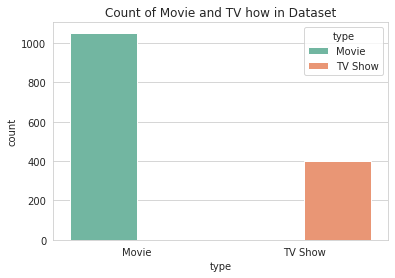

In [16]:
#Count plot for Disney Movies and tv shows

sns.countplot(x = 'type',data = new_df,hue='type', palette='Set2',)
plt.title('Count of Movie and TV how in Dataset')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Romance'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Musical'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Science_Fiction')])

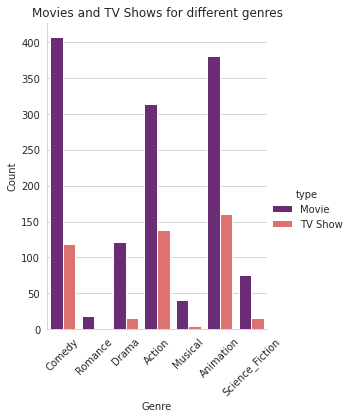

In [17]:
#Comparison of Movies and TV shows within different genre

listing_df=new_df.set_index('type')

listing_df.iloc[:,9:15]

genre=listing_df.groupby('type')['Comedy','Romance','Drama','Action','Musical','Animation','Science_Fiction'].sum().reset_index()

genre_df= genre.melt(id_vars='type',value_vars=['Comedy','Romance','Drama','Action','Musical','Animation', 'Science_Fiction'],var_name='Genre', value_name='Count',ignore_index=False)

sns.color_palette('pastel')
sns.catplot(
    data=genre_df, 
    x="Genre", y="Count",hue='type',kind='bar',color='red',palette="magma",height=5, aspect=.8
    )
plt.title('Movies and TV Shows for different genres')

plt.xticks(rotation=45)